In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

In [37]:
params = {'figure.figsize' : (10,5),
#          'text.usetex'    : True,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.labelsize' : 20,
          'axes.titlesize' : 20,
          'legend.fontsize': 15,
          'lines.linewidth'     : 3}

plt.rcParams.update(params)

# Derivacion Numerica 

**Objetivo general**
- Comprender cómo se realiza una derivada numérica y conocer sus diferentes aproximaciones.

**Objetivos particulares**
- Entender los pasos necesarios para llegar a las distintas aproximaciones de la primera derivada.
- Analizar mediante gráficas cuáles aproximaciones son mejores.
- Se proponen ejercicios para reforzar el tema.

## Contenido
- [Introducción y Preludio matematico.](#1)
    - [1.1 - Preludio matemático: series de Taylor.](#1-1)
        - [1.1.1 - Forma explícita de $R_k(x)$.](#1-1-1)
        - [1.1.2 - Reescribir el teorema.](#1-1-2)
- [2 - Primera aproximación: diferencia hacia adelante (forward difference).](#2)
    - [2.1 - Fórmula explícita e implementación de código](#2-1)
- [3 - Segunda aproximación: diferencia hacia atrás (backwards difference).](#3)
    - [3.1 - Fórmula explícita e implementación de código](#3-1)
- [4 - Tercera aproximación: diferencia centrada (central difference).](#4)
    - [4.1 - Fórmula explícita e implementación de código](#4-1)
- [5 - Ejercicios](#5)
    - [Ejercicio 0](#5-1)
    - [Herramienta interativa](#5-2)
    - [Ejercicio 1](#5-3)
    - [Ejercicio 2](#5-4)
- [6 - Masa y Densidad](#6)
    - [Ejercicio 1](#6-1)
    - [Ejercicio 2](#6-2) 
    - [Ejercicio 3](#6-3)
    - [Ejercicio 4](#6-4) 
    - [Ejercicio 5](#6-5)
    - [Ejercicio 6](#6-6) 

<a name='1'></a>
## Introducción y Preludio matematico

La derivada numérica es una técnica utilizada en programación para calcular aproximaciones de la derivada de una función matemática. Esta técnica se utiliza principalmente en problemas de optimización, control automático y cálculo numérico en general. La implementación de la derivada numérica en programación se basa en el uso de algoritmos y fórmulas matemáticas específicas para calcular la derivada de una función en un punto dado. 

Sin embargo, para poder entender como se llega a estas aproximaciones es necesario recordar un teorema.

<a name='1-1'></a>
### Preludio matemático: series de Taylor

Sea $f:\mathbb{R} \to \mathbb{R}$ diferenciable $k$ veces en un punto $a$. Entonces :

$$
f(x) = f(a) + f'(a)(x-a)+ \frac{f''(a)}{2!} (x-a)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(x-a)^k + R_{k}(x)
$$

Y $R_{k}(x)$ cumple que

\begin{equation}
\lim_{x\to a} \frac{R_{k}(x)}{(x-a)^k} = 0 \quad \left( R_k(x) \sim (x-a)^{k+1}\right)
\label{eq1}
\end{equation}

Así, en forma aproximada, se cumple que:
$$
f(x) \approx f(a) + f'(a)(x-a)+ \frac{f''(a)}{2!} (x-a)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(x-a)^k
$$

<a name='1-1-1'></a>
#### Forma explícita de $R_k(x)$

Utilizando el teorema del punto medio, podemos expresar a $R_k(x)$ como

$$
R_k(x) = \frac{f^{(k+1)}(\xi)}{(k+1)!} (x-a)^{k+1}
$$

Con $\xi$ un número real **fijo** entre $x$ y $a$. Con esta expresión, es claro que se la condición de $\lim_{x\to a} \frac{R_{k}(x)}{(x-a)^k} = 0 $ se cumple.

<a name='1-1-2'></a>
#### Reescribir el teorema:

Sustitución: $x-a = h \implies x = a+h$

$$
f(a+h) = f(a) + f'(a)(h)+ \frac{f''(a)}{2!} (h)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(h)^k + R_{k}(a+h)
$$

Y $R_{k}(a+h)$ cumple que

$$
\lim_{h\to 0} \frac{R_{k}(a+h)}{h^k} = 0 \quad \left( R_k(a+h) \sim h^{k+1}\right)
$$

Ahora ___¿Como aproximamos la derivda?___ Recordemos la definición formal de esta:

$$
f'(a) = \lim_{h\to 0 } \frac{f(a+h) - f(a)}{h}
$$

Pero, no podemos hacer limites en la computadora. Entonces fijamos un valor de $h$ muy pequeño y aproximamos el valor. Una aproximación de  **diferencias finitas**

<a name='2'></a>
## Primera aproximación: diferencia hacia adelante (forward difference)

Sea $f:\mathbb{R} \to \mathbb{R}$ diferenciable y sea $h > 0$, $h << a$.

Expandiendo $f(a+h)$ en polinomio de taylor de orden 1:

$$
f(a+h) = f(a) + f'(a)h + R_{1}(a+h)
$$

Despejo la derivada:

$$
f'(a) = \frac{f(a+h)-f(a)}{h} - \frac{R_{1}(a+h)}{h} \approx \frac{f(a+h)-f(a)}{h}
$$

$$
\lim_{h \to 0} \frac{R_1(a+h)}{h} = 0
$$

<a name='2-1'></a>
### Fórmula explícita e implementación de código

Así obtenemos la primera aproximación: __diferencia hacia adelante__

$$
\displaystyle
\dfrac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x)}{h}
$$

Definimos una función de Python para calcular está formula como sigue:

In [1]:
def forwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia adelante.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia adelante.
    """
    return (u(x+h)-u(x))/h

In [4]:
# Definimos un arreglo con diferentes tamaños de h:
N = 6
h = np.zeros(N)

h[0] = 1.0
for i in range(1,N):
    h[i] = h[i-1] * 0.5

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
x = np.ones(N)

print(h)
print(x)

[1.      0.5     0.25    0.125   0.0625  0.03125]
[1. 1. 1. 1. 1. 1.]


In [5]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ef = np.fabs( np.cos(x) - forwardFD(np.sin,x,h) )

# Colocamos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef]).transpose(), 
                     columns=['$h$','$D_+$'])
Error

,$h$,$D_+$
0,1.00000,0.472476
1,0.50000,0.228254
2,0.25000,0.110248
3,0.12500,0.053929
4,0.06250,0.026639
5,0.03125,0.013235


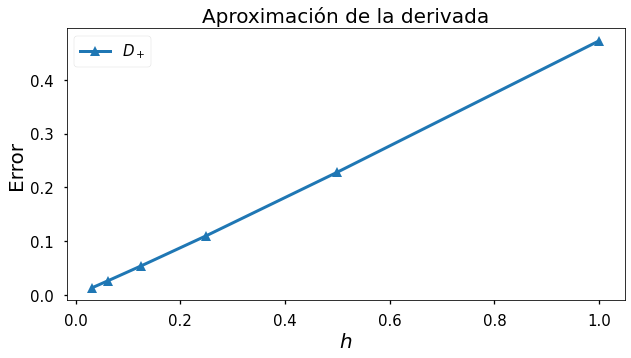

In [6]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.show()

<a name='3'></a>
## Segunda aproximación: diferencia hacia atrás (backwards difference)

De forma analoga al caso anterior, Sea $f:\mathbb{R} \to \mathbb{R}$ diferenciable y sea $h > 0$, $h << a$.

Expandiendo $f(a-h)$ en polinomio de taylor de orden 1:

$$
f(a-h) = f(a) + f'(a)(-h) + R_{1}(a-h)
$$

Despejo la derivada:

$$
f'(a) = \frac{f(a-h)-f(a)}{-h} - \frac{R_{1}(a-h)}{-h} = \frac{f(a)-f(a-h)}{h} + \frac{R_{1}(a-h)}{h}
$$


Obtenemos entonces:


$$
f'(a) \approx \frac{f(a)-f(a-h)}{h} 
$$

$$
\lim_{h \to 0} \frac{R_1(a-h)}{h} = 0
$$

<a name='3-1'></a>
### Fórmula explícita e implementación de código

De esta forma obtenemos la segunda aproximación: __Diferencia hacia atras__

$$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x) - u(x-h)}{h}
$$

Definimos una función de Python para calcular está formula como sigue:

In [7]:
def backwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia atrás.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia atrás.
    """
    return (u(x)-u(x-h))/h

In [8]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
eb = np.fabs( np.cos(x) - backwardFD(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef, eb]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$'])
Error

,$h$,$D_+$,$D_-$
0,1.00000,0.472476,0.301169
1,0.50000,0.228254,0.183789
2,0.25000,0.110248,0.099027
3,0.12500,0.053929,0.051118
4,0.06250,0.026639,0.025936
5,0.03125,0.013235,0.013059


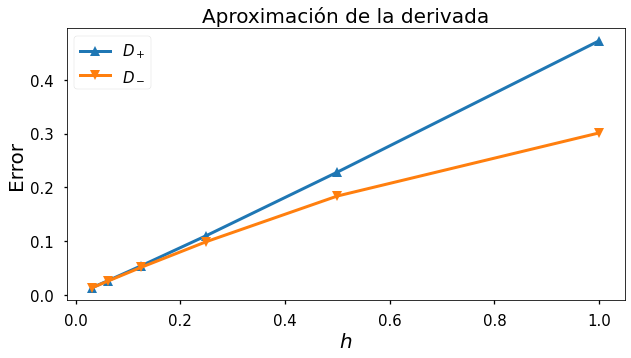

In [9]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.show()

<a name='4'></a>
## Tercera aproximación: diferencia centrada (central difference)

Primero expandimos $f(a+h)$ y $f(a-h)$ en polinomio de taylor de orden 2:

$$
f(a+h) = f(a) + f'(a) h + \frac{f''(a)}{2!} h^2 + R_2 (a+h)
$$


$$
\begin{split}
f(a-h) &= f(a) + f'(a)(- h) + \frac{f''(a)}{2!} (-h)^2 + R_2 (a-h) \\
&= f(a) - f'(a)h + \frac{f''(a)}{2!} h^2 + R_2 (a-h)
\end{split}
$$

Podemos restar ambas aproximaciones:

$$
\begin{split}
f(a+h) - f(a-h) &= (f(a) - f(a)) + (f'(a)h - (-f'(a) h)) + (\frac{f''(a)}{2!} h^2 - \frac{f''(a)}{2!} h^2) +  (R_2(a+h) - R_2(a-h)) \\
 &=  2 f'(a) h + (R_2(a+h) - R_2(a-h))
\end{split}
$$

Despejo la derivada:

$$
f'(a) = \frac{f(a+h) - f(a-h)}{2h} - \frac{R_2(a+h) - R_2(a-h)}{2h} \approx \frac{f(a+h) - f(a-h)}{2h}
$$

$$
\lim_{h \to 0} \frac{R_2(a+h) - R_2(a-h)}{2h} = 0
$$

<a name='4-1'></a>
### Fórmula explícita e implementación de código

De esta forma obtenemos la tercera aproximación: __Diferencia Centrada__

$$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x-h)}{2h}
$$

Definimos una función de Python para calcular está formula como sigue:

In [10]:
def centeredFD(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (u(x+h)-u(x-h))/(2*h)

In [11]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ec = np.fabs( np.cos(x) - centeredFD(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$'])
Error

,$h$,$D_+$,$D_-$,$D_0$
0,1.00000,0.472476,0.301169,0.085654
1,0.50000,0.228254,0.183789,0.022233
2,0.25000,0.110248,0.099027,0.005611
3,0.12500,0.053929,0.051118,0.001406
4,0.06250,0.026639,0.025936,0.000352
5,0.03125,0.013235,0.013059,0.000088


Observe que en este caso los errores son varios órdenes de magnitud más pequeños que para $D_+$ y $D_-$. Para hacer una gráfica más representativa usaremos escala log-log:

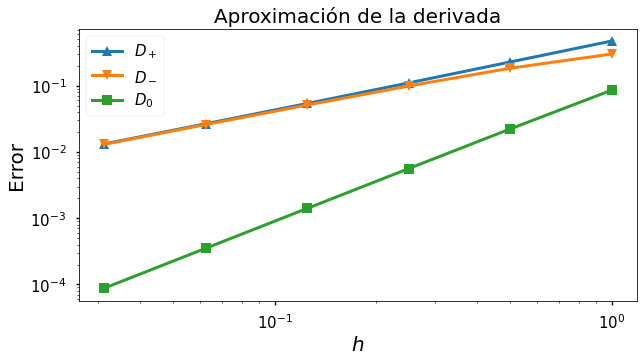

In [12]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

Como se puede apreciar, la gráfica anterior muestra que la aproximación con diferencias finitas centradas es mejor, pues es de orden cuadrático.

<a name='5'></a>
## Ejercicios.

<a name='5-1'></a>
### Ejercicio 0.
Para mejorar aún más la aproximación de la derivada se pueden usar más puntos en la fórmula de aproximación. Por ejemplo: 

$
D_3 u = \dfrac{1}{6 h} 
\left[ 2u_{i+1} + 3u_{i} - 6u_{i-1} + u_{i-2} \right]
$

- Agregar una función de Python para calcular la derivada con la fórmula anterior.
- Calcular el error, completar la tabla de errores y hacer el gráfico con todas las aproximaciones. 

Al final de este ejercicio se debe obtener un gráfico similar al de la siguiente figura:

<img src="../Figuras/dernum.png">

**Hint**: Recuerde que $u_i = u(x)$, $u_{i+1} = u(x+h)$, $u_{i-1} = u(x-h)$ y $u_{i-2} = u(x-2h)$.

In [13]:
# Implementación de D3
def D3(u,x,h):
    return (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h)) / (6*h)

In [14]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
e3 = np.fabs( np.cos(x) - D3(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec,e3]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$
0,1.00000,0.472476,0.301169,0.085654,0.043287
1,0.50000,0.228254,0.183789,0.022233,0.007314
2,0.25000,0.110248,0.099027,0.005611,0.001014
3,0.12500,0.053929,0.051118,0.001406,0.000132
4,0.06250,0.026639,0.025936,0.000352,0.000017
5,0.03125,0.013235,0.013059,0.000088,0.000002


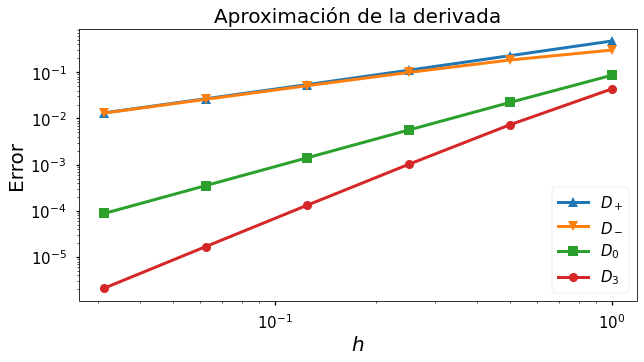

In [15]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, e3, 'o-', label='$D_3$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

<a name='5-2'></a>
### Herramienta interativa
La siguiente herramienta tiene como propósito mostras diferentes funciones y sus derivadas exactas así como el cálculo numérico de las derivadas usando varias aproximaciones. Puedes elegir la función y el tipo de aproximación. Después, puedes mover el punto donde se realiza la aproximación y el tamaño de la $h$.

In [1]:
# LINUX y MACOS
%run "./utils/src/zinteractive1.ipynb"

# Si usas WINDOWS debes comentar la línea de arriba y 
# descomentar la línea que sigue. Deberás también sustituir
# TU_DIRECTORIO por el directorio donde esté el repositorio GeoMaC

#%run "D:\\TU_DIRECTORIO\\GeoMaC\\DerivadasNumericas\\utils\\interactiveDerivadasNumericas.ipynb"

/var/folders/fj/ptqnynxd0jx8rkcv03q2__c00000gn/T/ipykernel_57954/3090349533.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


interactive(children=(Dropdown(description='Función', options=(cos(x), sin(x), exp(x), exp(x)*cos(x), tan(x), …

<function FD.numericalDer(f, x0, h, aprox='All')>

<a name='5-3'></a>
### Ejercicio 1.
Implementar la siguiente aproximación y graficarla junto con todos los resultados anteriores:

$$
f^\prime = \frac{3 f_i - 4 f_{i-1} + f_{i-2}}{2h}
$$

In [18]:
# Implementación
def D2_i(u,x,h):
    return (3*u(x) - 4*u(x-h) + u(x-2*h)) / (2*h)

In [19]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
e2_i = np.fabs( np.cos(x) - D2_i(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec,e3,e2_i]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$', '$D_2i$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_2i$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182


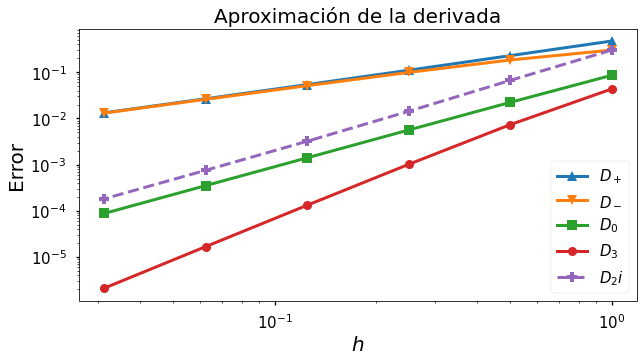

In [20]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, e3, 'o-', label='$D_3$')
plt.plot(h, e2_i, 'P--', label='$D_2i$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

<a name='5-4'></a>
### Ejercicio 2.
Obtener los coeficientes $A$, $B$ y $C$ para una aproximación del siguiente tipo: 

$$
f^\prime = A f_i + B f_{i+1} + C f_{i+2}
$$

y luego implementar la fórmula y graficarla junto con los resultados anteriores.

¿Cuál de todas las aproximaciones usaría? ¿Por qué?

Los coeficientes de la fórmula son: $A = -3 / 2h$, $B = 2/h$ y $C = -1/2h$ de tal manera que la fórmula de diferencias queda como sigue:

$$
f^\prime = \frac{-3 f_i + 4 f_{i+1} - f_{i+2}}{2h}
$$

In [21]:
# Implementación
def D2_d(u,x,h):
    return (-3*u(x) + 4*u(x+h) - u(x+2*h)) / (2*h)

In [22]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
e2_d = np.fabs( np.cos(x) - D2_d(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec,e3,e2_i,e2_d]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$', '$D_2i$', '$D_2d$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_2i$,$D_2d$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169,0.054474
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408,0.015967
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265,0.007759
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209,0.002389
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754,0.000651
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182,0.000169


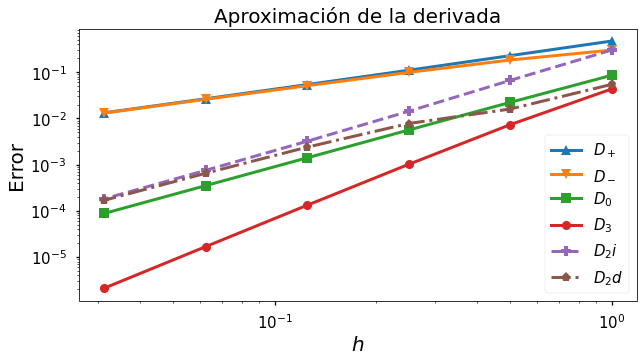

In [23]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, e3, 'o-', label='$D_3$')
plt.plot(h, e2_i, 'P--', label='$D_2i$')
plt.plot(h, e2_d, 'p-.', label='$D_2d$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

Podemos notar lo siguiente:

Si lo que se quiere es mejor precisión, entonces la aproximación que se debe usar es la $D_3$, pues con esta se obtiene un menor error. 

Si se requiere rapidez, entonces se podría usar $D_+$ o $D_-$.

Sin embargo, la que parece que tiene un mejor comportamiento, en términos de rapidez y precisión, es la $D_0$. 

<a name='6'></a>
## Masa y densidad

Don Nacho, un experimentado maestro albañil, necesita cortar una varilla de metal en varias secciones para construir una escalera. Realiza las marcas de la varilla y se ven como en la siguiente figura:

<img src="./secciones.png">

Como se observa, el tamaño de cada sección de la varilla es de 0.5 m. Por razones de la estructura, se necesita conocer el peso de cada sección de la varilla para evitar que la escalera se derrumbe. Don Nacho hizo los cortes y pesó cada sección, obteniendo los siguientes resultados:

| Sección | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|---|---|---|---|---|---|---|---|---|
| Masa [Kg] | 0.595 | 0.806 | 0.369 | 1.078 | 1.704 | 1.475 | 2.263 |  3.282 |

<a name='6-1'></a>
### Ejercicio 1.
Construya dos arreglos de numpy: uno para almacenar las marcas de las secciones de nombre `secciones` y otro que se llame `masas_sec` para almacenar las masas de cada sección. Haga una gráfica de barras de las masas de cada sección.

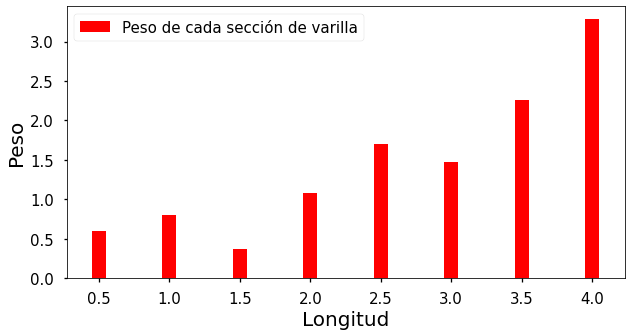

In [26]:
# Marcas sobre la varilla de cada sección
secciones = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5,  4.0]) 

# Peso de cada sección [kg]
masas_sec = np.array([0.595, 0.806, 0.369, 1.078, 1.704, 
                      1.475, 2.263,  3.282])

plt.bar(secciones[1:], masas_sec, 
        width=0.1, color='r', 
        label='Peso de cada sección de varilla')
plt.xlabel('Longitud')
plt.ylabel('Peso')
plt.legend()
plt.show()

<a name='6-2'></a>
### Ejercicio 2.
El peso se puede ir acumulando para obtener el peso original de la varilla. El código siguiente hace esa acumulación y guarda la información en el arreglo `masa` de numpy:

```python
masa = np.zeros(len(secciones))
for i, ms in enumerate(masas_sec):
    masa[i+1] = masa[i] + ms
```

Escriba el código anterior y después grafique el contenido del arreglo `masa` sobre la gráfica de barras anterior.

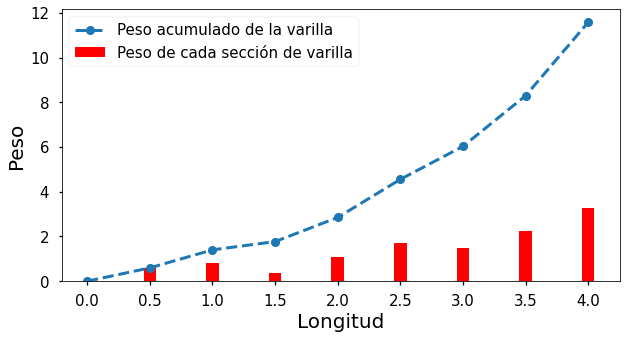

In [27]:
masa = np.zeros(len(secciones))
for i, ms in enumerate(masas_sec):
    masa[i+1] = masa[i] + ms
    
plt.plot(secciones, masa, 
         'o--', label='Peso acumulado de la varilla')

plt.bar(secciones[1:], masas_sec, 
        width=0.1, color='r', 
        label='Peso de cada sección de varilla')
plt.xlabel('Longitud')
plt.ylabel('Peso')
plt.legend()
plt.show()

<a name='6-3'></a>
### Ejercicio 3.
Si todo se hizo correctamente, se verá que el peso no crece linealmente. Se sospecha que la densidad de la varilla no cambia homogéneamente en toda su longitud. Suponemos que todo está en una dimensión, de tal manera que podemos definir una densidad *lineal* de la siguiente manera:

$$
\rho(x) = \frac{\text{Masa}}{Longitud} = \frac{m}{l}
$$

Recordemos que la masa es una **propiedad extensiva**: es directamente proporcional al tamaño del sistema o a la cantidad de material, mientras que la densidad es una **propiedad intensiva**: no depende del tamaño del sistema, es invariante a la escala.

Si observamos con atención, esta densidad se puede calcular por cada sección, vea la figura:

<img src="./secciones_mi.png">


$\rho_i = \dfrac{m_i}{l_i}$ para $i = 0,1,2, \dots$ donde $m_i$ es la masa de la sección y $l_i$ su longitud.

Si observamos con más atención, la densidad de la sección $i$ se puede obtener mediante la siguiente aproximación:

$\rho_i \approx \dfrac{m_{i} - m_{i-1}}{l_{i} - l_{i-1}} = \dfrac{m_{i} - m_{i-1}}{\delta l_{i}} $

La fórmula anterior, cuando $\delta l_{i} \to 0$, representa una derivada:

$\displaystyle
\rho_i = \lim_{\delta l_{i} \to 0} \dfrac{m_{i} - m_{i-1}}{\delta l_{i}} = \dfrac{d}{d x}\Big(m (x)\Big)
$

Escriba una función para calcular la densidad de la barra para cada sección usando la aproximación anterior. Grafique la masa y la densidad en una sola figura.

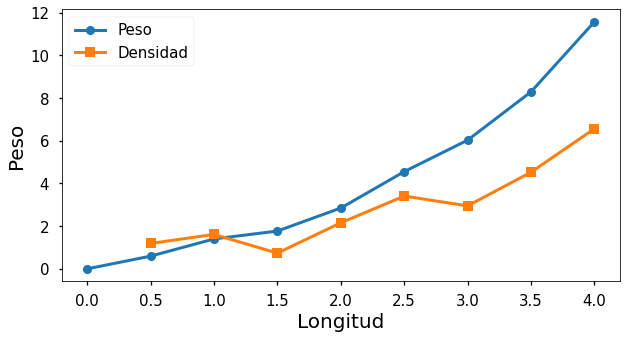

In [28]:
derivada = lambda u, x : [(u[i] - u[i-1]) / (x[i] - x[i-1]) for i in range(1,len(x))]
densidad = derivada(masa, secciones)
plt.plot(secciones, masa, 'o-', label='Peso')
plt.plot(secciones[1:], densidad,'s-', label='Densidad')
plt.xlabel('Longitud')
plt.ylabel('Peso')
plt.legend()
plt.show()

La gráfica debe mostrar cambios en la densidad para cada sección de la varilla.

<a name='6-4'></a>
### Ejercicio 4.
Después de una búsqueda sobre las especificaciones de la varilla, se encuentra que la densidad está dada por siguiente fórmula:

$\rho = (1000 x^2 + 5000 \sin(2x)^2 ) \times A$

donde $x$ es la posición en la varilla y $A$ es el área transversal. Al medir el diámetro de la varilla se encuentra el valor de $d = 0.02$ m , por lo tanto el radio es $r = 0.01$ m.

Grafique está fórmula y cómparela con los cálculos aproximados que hicimos antes:

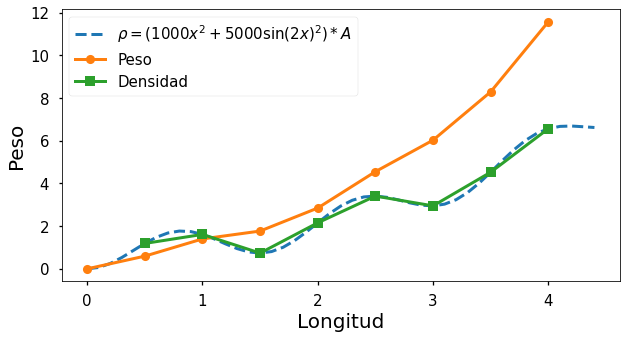

In [29]:
r = 0.01
A = np.pi * r ** 2
calcDen = lambda x: (1000 * x**2 + 5000 * np.sin(2*x)**2 ) * A
x = np.arange(0.0, 4.5, .1)
ρ = [calcDen(l) for l in x]
plt.plot(x, ρ, '--', label = '$\\rho =(1000 x^2 + 5000 \sin(2x)^2 ) * A $')

plt.plot(secciones, masa, 'o-', label='Peso')
plt.plot(secciones[1:], densidad,'s-', label='Densidad')
plt.xlabel('Longitud')
plt.ylabel('Peso')
plt.legend()
plt.show()

<a name='6-5'></a>
### Ejercicio 5.
Para evaluar la aproximación, cálcule el error absoluto y el error relativo para cada punto.


In [30]:
Ea = lambda e, a: np.fabs(e - a)
Er = lambda e, a: np.fabs(e - a) / np.fabs(e)
densidad_e = calcDen(secciones[1:])

error_a = []
error_r = []
for e,a in zip(densidad_e, densidad):
    error_a.append(Ea(e,a))
    error_r.append(Er(e,a))

import pandas as pd
df = pd.DataFrame(np.array([error_a, error_r]).T, 
                  columns=['Ea', 'Er'])
df

,Ea,Er
0,0.000779,0.000654
1,0.000928,0.000575
2,0.000141,0.000190
3,0.000311,0.000144
4,0.000101,0.000030
5,0.000070,0.000024
6,0.000456,0.000101
7,0.000090,0.000014


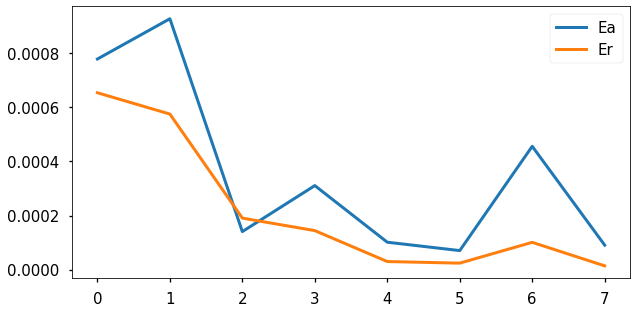

In [32]:
df.plot();

<a name='6-6'></a>
### Ejercicio 6.
Calcule la integral de la densidad

$\rho = (1000 x^2 + 5000 \sin(2x)^2 ) \times A$

para encontrar la fórmula de la masa $m(x)$.

Después realice todas las graficas de tal manera que obtenga una figura como la siguiente:

<img src="../Figuras/tresgraficas.png">

**Hint**: Para calcular la integral puede usar sympy, por ejemplo:
```python
from sympy import Symbol, integrate, sin
x = Symbol('x')
integrate(sin(2x)**2, x)
```
Utilice la función `subplots()` de matplotlib para crear varias gráficas en una sola figura, por ejemplo:

```python
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(x, m, 'C0--', label = 'Gráfica 1')
axs[1].plot(x, d, 'C1-', label= 'Gráfica 2')
plt.show()
```

In [33]:
from sympy import integrate, Symbol, sin
xx = Symbol('x')
integrate(1000 * xx**2 + 5000 * sin(2*xx)**2, xx)

1000*x**3/3 + 2500*x - 1250*sin(2*x)*cos(2*x)

In [34]:
calcMas = lambda x: (1000 * x**3 / 3 + 2500*x - 1250 * np.sin(2*x) * np.cos(2*x) ) * A
x = np.arange(0.0, 4.5, .1)
m = [calcMas(l) for l in x]


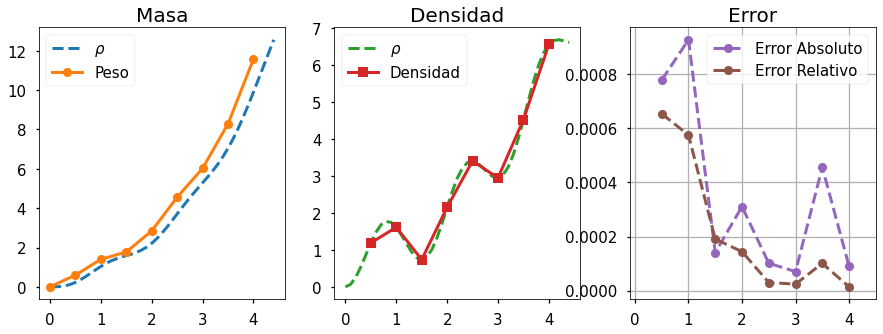

In [35]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

axs[0].plot(x, m, 'C0--', label = '$\\rho$')
axs[0].plot(secciones, masa, 'C1o-', label='Peso')
axs[0].set_title('Masa')
axs[0].legend()

axs[1].plot(x, ρ, 'C2--', label = '$\\rho$')
axs[1].plot(secciones[1:], densidad,'C3s-', label='Densidad')
axs[1].set_title('Densidad')
axs[1].legend()

axs[2].plot(secciones[1:], error_a, 'C4o--', label='Error Absoluto')
axs[2].plot(secciones[1:], error_r, 'C5o--', label='Error Relativo')
axs[2].set_xlim(-0.1,4.5)
axs[2].set_title('Error')
axs[2].legend()
axs[2].grid()
plt.show()